In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import ttest_ind
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl

In [2]:
mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['text.latex.unicode'] = True

In [3]:
#files = glob('../scripts/results/1955_1985/standard/results_*.txt')
#files = glob('../scripts/results_*.tsv')
files = glob('../scripts/COS_results.tsv')
files2 = glob('../scripts/MSE_results.tsv')
def from_files(files):
    dfs = []
    for filename in files:
        dfs.append(pd.read_table(filename))
    df = pd.concat(dfs)
    df['DATA'] = df['DATA'].apply(lambda path: path.split(',')[-1][:-4])
    df['MODEL'] = df['MODEL'].replace({'nn_baseline' : 'NO', 'offset': 'ADD', 'transformation': 'TRANS', 'weighted': 'WEIGHTS'})
    df['EMBEDDINGS'] = df['EMBEDDINGS'].apply(lambda path: 'aligned' if 'aligned' in path else 'non-aligned')
    return df

In [4]:
df = from_files(files)
df.head()

MRR  ACC   MSE   COS MODEL  N_train  N_test  EPOCHS    DATA   EMBEDDINGS  \
0  5.42  0.0  0.82  0.67   ADD      116      28       0  doping  non-aligned   
1  4.97  0.0  0.77  0.66   ADD      116      28       0  doping  non-aligned   
2  6.39  0.0  0.77  0.67   ADD      116      28       0  doping  non-aligned   
3  9.89  0.0  0.73  0.68   ADD      116      28       0  doping  non-aligned   
4  5.94  0.0  0.80  0.68   ADD      116      28       0  doping  non-aligned   

   0SHOT/K  
0        1  
1        2  
2        3  
3        4  
4        5

In [5]:
df['N_train'].unique()

array([ 116,   52,   36,   16,   48,  308, 3819,   26,    4,  168,  548,
          7,   15, 3072,  128,   23,  720,  327, 4752, 1082,   12,   39,
        468,  576,    5,  120,   29, 1210,   10, 4025,  432])

In [6]:
df[df['N_train'] < 48]['DATA'].unique()

array(['computer', 'marxisme', 'quiz', 'supermarkt', 'geboorteregeling',
       'doping', 'compactdisc', 'immigranten', 'kruidenier'], dtype=object)

In [7]:
df = df[~df['DATA'].isin(df[df['N_train'] < 48]['DATA'].unique())]

In [8]:
df[df['DATA'] == 'utrecht']

MRR  ACC      MSE   COS    MODEL  N_train  N_test  EPOCHS     DATA  \
120  0.00  0.0  2945.25  0.71  WEIGHTS     4752    1188      10  utrecht   
121  0.00  0.0  2955.66  0.72  WEIGHTS     4752    1188      10  utrecht   
122  0.00  0.0  2940.02  0.72  WEIGHTS     4752    1188      10  utrecht   
123  0.00  0.0  2953.87  0.71  WEIGHTS     4752    1188      10  utrecht   
124  0.07  0.0  2915.58  0.72  WEIGHTS     4752    1188      10  utrecht   
260  0.00  0.0   166.26  0.69    TRANS     4025    1006      10  utrecht   
261  0.00  0.0   167.59  0.69    TRANS     4025    1006      10  utrecht   
262  0.00  0.0   168.69  0.69    TRANS     4025    1006      10  utrecht   
263  0.00  0.0   169.97  0.69    TRANS     4025    1006      10  utrecht   
264  0.00  0.0   172.84  0.69    TRANS     4025    1006      10  utrecht   
345  0.85  0.0    30.57  0.27    TRANS     4752    1188      10  utrecht   
346  0.92  0.0    30.41  0.27    TRANS     4752    1188      10  utrecht   
347  1.23  0.0    31.21  0.27    TRANS     4752    1188      10  utrecht   
348  1.04  0.0    30.96  0.27    TRANS     4752    1188      10  utrecht   
349  0.98  0.0    30.21  0.27    TRANS     4752    1188      10  utrecht   
350  0.19  0.0     1.90  0.30      ADD     4752    1188       0  utrecht   
351  0.24  0.0     1.90  0.30      ADD     4752    1188       0  utrecht   
352  0.49  0.0     1.90  0.30      ADD     4752    1188       0  utrecht   
353  0.29  0.0     1.90  0.30      ADD     4752    1188       0  utrecht   
354  0.20  0.0     1.90  0.30      ADD     4752    1188       0  utrecht   
375  0.13  0.0     1.16  0.42       NO     4025    1006       0  utrecht   
376  0.09  0.0     1.16  0.42       NO     4025    1006       0  utrecht   
377  0.12  0.0     1.16  0.42       NO     4025    1006       0  utrecht   
378  0.03  0.0     1.16  0.42       NO     4025    1006       0  utrecht   
379  0.06  0.0     1.16  0.42       NO     4025    1006       0  utrecht   
440  0.15  0.0  2353.22  0.71  WEIGHTS     4025    1006      10  utrecht   
441  0.00  0.0  2378.33  0.71  WEIGHTS     4025    1006      10  utrecht   
442  0.00  0.0  2363.39  0.72  WEIGHTS     4025    1006      10  utrecht   
443  0.00  0.0  2347.20  0.71  WEIGHTS     4025    1006      10  utrecht   
444  0.07  0.0  2378.34  0.72  WEIGHTS     4025    1006      10  utrecht   
500  0.00  0.0     1.16  0.42       NO     4752    1188       0  utrecht   
501  0.00  0.0     1.16  0.42       NO     4752    1188       0  utrecht   
502  0.00  0.0     1.16  0.42       NO     4752    1188       0  utrecht   
503  0.00  0.0     1.16  0.42       NO     4752    1188       0  utrecht   
504  0.00  0.0     1.16  0.42       NO     4752    1188       0  utrecht   
535  0.38  0.0     1.44  0.41      ADD     4025    1006       0  utrecht   
536  0.59  0.1     1.42  0.41      ADD     4025    1006       0  utrecht   
537  0.47  0.0     1.42  0.41      ADD     4025    1006       0  utrecht   
538  0.47  0.0     1.44  0.40      ADD     4025    1006       0  utrecht   
539  0.39  0.0     1.43  0.41      ADD     4025    1006       0  utrecht   

      EMBEDDINGS  0SHOT/K  
120  non-aligned        1  
121  non-aligned        2  
122  non-aligned        3  
123  non-aligned        4  
124  non-aligned        5  
260      aligned        1  
261      aligned        2  
262      aligned        3  
263      aligned        4  
264      aligned        5  
345  non-aligned        1  
346  non-aligned        2  
347  non-aligned        3  
348  non-aligned        4  
349  non-aligned        5  
350  non-aligned        1  
351  non-aligned        2  
352  non-aligned        3  
353  non-aligned        4  
354  non-aligned        5  
375      aligned        1  
376      aligned        2  
377      aligned        3  
378      aligned        4  
379      aligned        5  
440      aligned        1  
441      aligned        2  
442      aligned        3  
443      aligned        4  
444      aligned        5  
500  non-aligned     

In [9]:
df[df['N_train'] < 48]['DATA'].unique()

array([], dtype=object)

In [10]:
df['N'] = df['N_train'] + df['N_test']

In [11]:
df2 = from_files(files2)
df2 = df2[~df2['DATA'].isin(df2[df2['N_train'] < 48]['DATA'].unique())]
df2['N'] = df2['N_train'] + df2['N_test']

In [12]:
def plot_means(series):
    means = series.mean()
    errors = series.std()
    print(means)
    means.plot.bar(yerr=errors, ax=ax)

# Model comparison
## MRR (overview)

MODEL
ADD        2.326000
NO         2.277111
TRANS      2.917333
WEIGHTS    9.128000
Name: MRR, dtype: float64


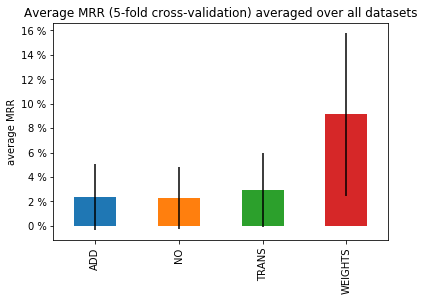

In [13]:
gp = df.where(df['EMBEDDINGS'] == 'non-aligned').groupby(['MODEL'])
fig, ax = plt.subplots()
plot_means(gp['MRR'])
#gp['MRR'].mean().plot.bar(ax=ax)
plt.title('Average MRR (5-fold cross-validation) averaged over all datasets')
plt.xlabel("")
plt.ylabel("average MRR")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d %%'))
fig.savefig('5_models_MRR.png', dpi=100)
plt.show()

* Trained models beat baselines
* Weighted vector combination slightly higher mean
* Very high standard deviation, probably due to varying performance across datasets

## COS (overview)

MODEL
ADD        0.590222
NO         0.693778
TRANS      0.521111
WEIGHTS    0.874222
Name: COS, dtype: float64


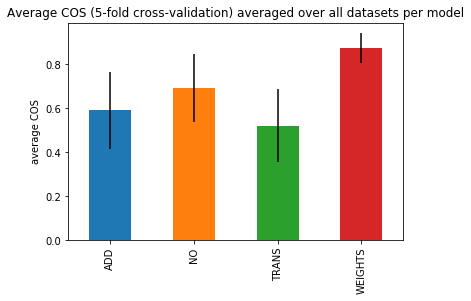

In [14]:
gp = df.where(df['EMBEDDINGS'] == 'non-aligned').groupby(['MODEL'])
fig, ax = plt.subplots()
plot_means(gp['COS'])
#gp['COS'].mean().plot.bar()
plt.title('Average COS (5-fold cross-validation) averaged over all datasets per model')
plt.xlabel("")
plt.ylabel("average COS")
fig.savefig('1_models_MSE.png', dpi=100)
plt.show()

* Offset baseline less similar than concept word at t_1 baseline. Apparently assumptions of
  unweighted linear combination do not hold for diachronic analogies (on non-aligned vector spaces) and the concept words neighrest neighbours are a better approximation
* Transformation has even lower average cosine similarity. Apparently, applying a transformation to embeddings on t_1 that was learned on the concept vocabulary of t_0 does not work as well as using a linear combination of the 
* Note that the weighted combination has the lowest standard deviation in average cosine similarity across datasets.

## MRR (per dataset)

9


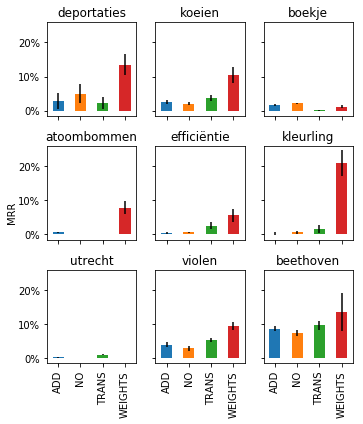

In [49]:
import matplotlib.ticker

def compare_embeddings(df, ax):
    gp = df[df['EMBEDDINGS'] == 'non-aligned'].groupby('MODEL')
    means = gp['MRR'].mean()
    errors = gp['MRR'].std()
    means.plot.bar(yerr=errors, ax=ax)

    
data = df['DATA'].unique()
print(len(data))
datasets = (data[:3], data[3:6], data[6:9])
fig, rows = plt.subplots(3, 3, sharex=True, sharey=True)

for row, dataset in zip(rows, datasets):
    for ax, datum in zip(row, dataset):
        #ax.set_title("{0} (N={1})".format(datum, df[df['DATA'] == datum]['N'].max()))
        ax.set_title("{0}".format(datum))
        ax.set_xlabel("")
        compare_embeddings(df[df['DATA'] == datum], ax)

for ax in rows.flat:
    ax.set(xlabel='', ylabel='')
    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    yticks = matplotlib.ticker.FormatStrFormatter(fmt)
    ax.yaxis.set_major_formatter(yticks)

#fig.text(0.5, 0.0, 'Model', ha='center')
fig.text(0.0, 0.5, 'MRR', va='center', rotation='vertical')
    
fig.set_size_inches(5, 6)
plt.tight_layout()
#fig.subplots_adjust(hspace=1, bottom=0.25)

fig.savefig('../../ma-thesis/figures/3_models_datasets_MRR.pgf')
plt.show()

### COS Loss

* MRR shows clearer differences between the models. It is also the more relevant metric, because it measures how close the models' predictions are to the labels in comparison to other vocabulary vectors, not just in the space in general. In the end, we are not interested in minimizing cosine distance per se, but in retrieving meaningful word lists that help to study concept change.
* On most datasets the weighted vector combination performs best, again with a tendency to performe better on smaller datasets. Exceptions are utrecht and boekje, the two largest datasets. However, it also has higher standard deviations, showing that performance in these cases varies more strongly between the folds. 
* On most datasets, the transformation performs better than the baselines, altough sometimes only with a small margin. Notable exceptions are the deportaties dataset and the atoombommen. This means that interestingly, the transformation function manages to predict more relevant vocabulary than the baselines even tough its raw averaged cosine similarites are lower.

### MSE Loss
* Trained models beat all baselines in term of MRR score, altough with a very thin margin in some examples (cf. boekje). However, for some datasets (kleurling, atoombommen and efficientie) improve over the baseline multiple times.
* For "deportaties" and "violen", the transformation function beats the weighted vector combination. How can this be? 
  Apparanetly, here the assumption holds to a higher degree, that the relationships between concept words in t_0 also apply to t_1.


## COS (per dataset)

9


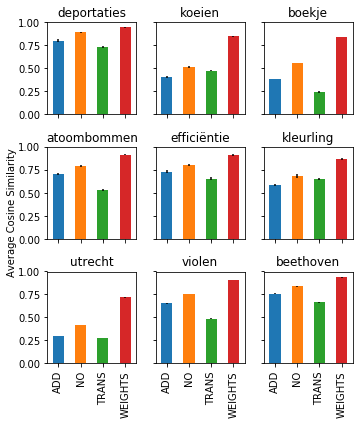

In [45]:
def compare_embeddings(df, ax):
    gp = df[df['EMBEDDINGS'] == 'non-aligned'].groupby('MODEL')
    means = gp['COS'].mean()
    errors = gp['COS'].std()
    means.plot.bar(yerr=errors, ax=ax)

    
data = df['DATA'].unique()
print(len(data))
datasets = (data[:3], data[3:6], data[6:9])
fig, rows = plt.subplots(3, 3, sharex=True, sharey=True)

for row, dataset in zip(rows, datasets):
    for ax, datum in zip(row, dataset):
        #ax.set_title("{0} (N={1})".format(datum, df[df['DATA'] == datum]['N'].max()))
        ax.set_title("{0}".format(datum))
        compare_embeddings(df[df['DATA'] == datum], ax)

for ax in rows.flat:
    ax.set(xlabel='', ylabel='')

#fig.text(0.5, 0.0, 'Model', ha='center')
fig.text(0.0, 0.5, 'Average Cosine Similarity', va='center', rotation='vertical')
    
fig.set_size_inches(5, 6)
plt.tight_layout()
#fig.subplots_adjust(hspace=1, bottom=0.25)

fig.savefig('../../ma-thesis/figures/1_models_datasets_COS.pgf')
plt.show()

In [48]:
gp = df[df['EMBEDDINGS'] == 'non-aligned'][['MODEL', 'DATA', 'COS']].groupby(['DATA', 'MODEL'])
means = gp['COS'].mean()
stds = gp['COS'].std()
latex = pd.DataFrame({'MEAN': means, 'STD': stds}).to_latex()
with open('../../table.tex', 'w+') as f:
    print(latex, file=f)

### COS Loss

* We see interesting differences in performance between the different models.  
* Very low standard deviation, indicating stable performance across folds, except for kleurling dataset
* Also for most datasets the offset baseline has lower cosine similarity than concept word at t_1 baseline, apparently it is better to look into the neighbourhood of the concept word in the new vector space instead of assuming a linear relationship across the vector spaces (again except on the kleruling dataset)
* There seems to be a trend that smaller datasets have higher cosine similarity across model. This makes sense for the trained models, as smaller datasets have less diverse vocabulary, so that it is easier for the model to capture the lexical relationships. However, why does the baselines' performance also seem to depend on the dataset size? It could be that there are other parameters than size itself.
* On most datasets the transformation model is worse than the baselines (again except kleurling). Apparently on average it is not benefical in terms of cosine similarity to assume that the same transformation is applicable to both vector spaces across time.
* On all datasets the weighted vector combination is the best performing model

### MSE Loss
* Trained functions have lower MSE than baselines for all datasets
* Very low standard deviation, indicating stable performance across folds
* Also for all datasets the offset baseline has higher error than concept word at t_1 baseline
* There seems to be a vague trend that smaller datasets have less error across models
* The concept vocabularies "deporations" (deportation, prosecution of Jews) and "beethoven" (classical composers) have the lowest errors overall. "utrecht" (dutch cities), "boekje" (books, magazines) and "koeien" (cows)

# Alignment comparison
## MRR (overview)

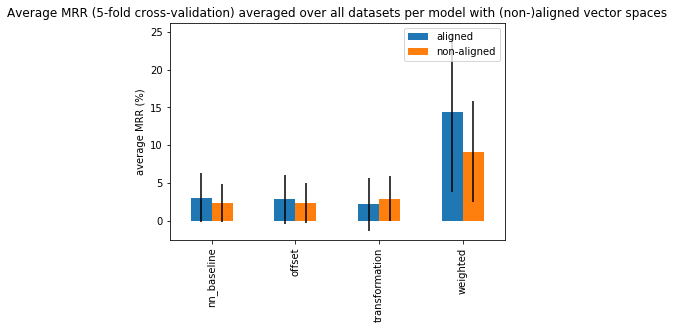

In [29]:
gp = df[df['EMBEDDINGS'] == 'non-aligned'].groupby('MODEL')
gp2 = df[df['EMBEDDINGS'] == 'aligned'].groupby('MODEL')

means = gp['MRR'].mean()
errors = gp['MRR'].std()
means2 = gp2['MRR'].mean()
errors2 = gp2['MRR'].std()

fig, ax = plt.subplots()
means3 = pd.DataFrame({'aligned': means2, 'non-aligned': means})
errors3 = pd.DataFrame({'aligned': errors2, 'non-aligned': errors})
means3.plot.bar(yerr=errors3, ax=ax)

plt.title('Average MRR (5-fold cross-validation) averaged over all datasets per model with (non-)aligned vector spaces')
plt.xlabel("")
plt.ylabel("average MRR (%)")
fig.savefig('7_alignment_MRR.png', dpi=100)
plt.show()

* Also aligned, the trained models beat the baselines
* In MRR, we see a notable improvement in the overall score (in contrast to MSE), indicating that the alignment helps
  to recover more relevant words. The improvement is relatively higher for the trained methods than for the
  baselines.
* In terms of MRR, the weighted vector combination has a notably higher mean score than the transformation. However, standard deviation is
  very high, indicating varying performance across datasets

## COS (overview)

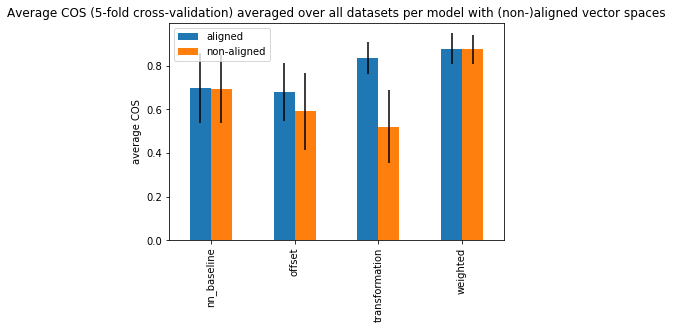

In [30]:
gp = df[df['EMBEDDINGS'] == 'non-aligned'].groupby('MODEL')
gp2 = df[df['EMBEDDINGS'] == 'aligned'].groupby('MODEL')

means = gp['COS'].mean()
errors = gp['COS'].std()
means2 = gp2['COS'].mean()
errors2 = gp2['COS'].std()

fig, ax = plt.subplots()
means3 = pd.DataFrame({'aligned': means2, 'non-aligned': means})
errors3 = pd.DataFrame({'aligned': errors2, 'non-aligned': errors})
means3.plot.bar(yerr=errors3, ax=ax)

plt.title('Average COS (5-fold cross-validation) averaged over all datasets per model with (non-)aligned vector spaces')
plt.xlabel("")
plt.ylabel("average COS")
fig.savefig('3_alignment_COS.png', dpi=100)
plt.show()

### COS Loss

* All systems show a notable improvement with aligned vectors spaces, even if the performance again seems to be varying strongly across datasets.
* After alignment, the overall performance of the transformation is slightly above the baselines. 

### MSE Loss
* Alignment only makes a notable difference in overall MSE for the offset baseline, which seems to be in line with
  the point made above. If we align the axes of the compared vector spaces, then a linear combination becomes more
  feasible. However, it is still the model with the highest error. 

## MRR (per dataset)

In [31]:
len(df['DATA'].unique())

9

9


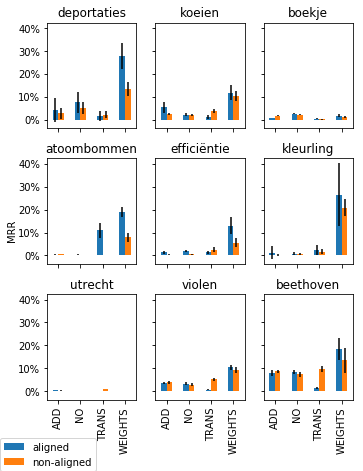

In [47]:
def compare_embeddings(df, ax):
    gp = df[df['EMBEDDINGS'] == 'non-aligned'].groupby('MODEL')
    gp2 = df[df['EMBEDDINGS'] == 'aligned'].groupby('MODEL')

    means = gp['MRR'].mean()
    errors = gp['MRR'].std()
    means2 = gp2['MRR'].mean()
    errors2 = gp2['MRR'].std()

    means3 = pd.DataFrame({'aligned': means2, 'non-aligned': means})
    #print(means3)
    errors3 = pd.DataFrame({'aligned': errors2, 'non-aligned': errors})
    means3.plot.bar(yerr=errors3, ax=ax, legend=None)

    
data = df['DATA'].unique()
print(len(data))
datasets = (data[:3], data[3:6], data[6:9])
fig, rows = plt.subplots(3, 3, sharex=True, sharey=True)

for row, dataset in zip(rows, datasets):
    for ax, datum in zip(row, dataset):
        #print("\n"+datum)
        #ax.set_title("{0} (N={1}, {2})".format(datum, df[df['DATA'] == datum]['N'].min(), df[df['DATA'] == datum]['N'].max()))
        ax.set_title("{0}".format(datum))
        ax.set_xlabel("")
        compare_embeddings(df[df['DATA'] == datum], ax)

for ax in rows.flat:
    ax.set(xlabel='', ylabel='')
    fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
    yticks = matplotlib.ticker.FormatStrFormatter(fmt)
    ax.yaxis.set_major_formatter(yticks)

#fig.text(0.5, 0.0, 'Model', ha='center')
fig.text(0.0, 0.5, 'MRR', va='center', rotation='vertical')
    
fig.set_size_inches(5, 6.5)
plt.tight_layout()

fig.legend(['aligned', 'non-aligned'], loc=(0,0))
#fig.subplots_adjust(hspace=1, bottom=0.25)

fig.savefig('../../ma-thesis/figures/4_alignment_datasets_MRR.pgf')
plt.show()

### COS Loss

* For the baselines and in particular the weighted vector combination we see notable improvements in most cases, altough not as dramatic as in the case of cosine similarity scores. If there is no improvement, we see at least performance comparable to the non-aligned variant. An exception is the offset baseline on the boekje dataset, which performes worse than non-aligned.
* The performance of the transformation function has diverse behaviour in average MRR performance. On some datasets (all smaller), we see improvements with alignment, in the case of the atoombommen dataset a very large one. On other datasets (all relatively large), we see a drop in performance, sometimes very sharp as on the beethoven or violen dataset. In conclusion, alignment might help on smaller datasets, but overall the behaviour seems rather inconsistent. Furthermore, even in case of improved performance the model does not always beat the baselines and is still outperformed by the weighted vector composition. Why is this the case even tough we see notable improvemnts in the average cosine similarity for the transformation with alignment? Do error analysis, e.g. with beethoven!
* performance on the utrecht dataset is very, very low for all models. Surprisingly, here the non-aligned transformation has the highest performance in comparison to the other models.
* Despite for the two largest datasets, the weighted vector composition has always notably higher MRR than the other models.

### MSE loss
* Changes are small for larger datasets, sometimes non-existent or negative.
* Transform vs weighted is similar for most datasets, except for atoombommen and kleurling, both rather small
  datasets
* Smaller dataset sizes due to restriction to shared vocabulary needs some interpretation. Aren non/aligned
  effectively two seperate datasets and therefore hard to compare? 

In [15]:
gp = df[df['EMBEDDINGS'] == 'non-aligned'][['MODEL', 'DATA', 'MRR']].groupby(['DATA', 'MODEL'])
means = gp['MRR'].mean()
stds = gp['MRR'].std()

gp2 = df[df['EMBEDDINGS'] == 'aligned'][['MODEL', 'DATA', 'MRR']].groupby(['DATA', 'MODEL'])
means2 = gp['MRR'].mean()
stds2 = gp['MRR'].std()

latex = pd.DataFrame({'MEAN': means, 'STD': stds, 'MEAN_aligned': means2, 'STD_aligned': stds2}).to_latex()
with open('../../mrr.tex', 'w+') as f:
    print(latex, file=f)

## COS (per dataset alignment)

9


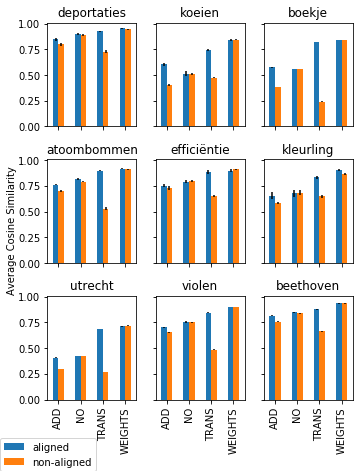

In [40]:
def compare_embeddings(df, ax):
    gp = df[df['EMBEDDINGS'] == 'non-aligned'].groupby('MODEL')
    gp2 = df[df['EMBEDDINGS'] == 'aligned'].groupby('MODEL')

    means = gp['COS'].mean()
    errors = gp['COS'].std()
    means2 = gp2['COS'].mean()
    errors2 = gp2['COS'].std()

    means3 = pd.DataFrame({'aligned': means2, 'non-aligned': means})
    errors3 = pd.DataFrame({'aligned': errors2, 'non-aligned': errors})
    means3.plot.bar(yerr=errors3, ax=ax, legend=None)

    
data = df['DATA'].unique()
print(len(data))
datasets = (data[:3], data[3:6], data[6:9])

fig, rows = plt.subplots(3, 3, sharex=True, sharey=True)

for row, dataset in zip(rows, datasets):
    for ax, datum in zip(row, dataset):
        #ax.set_title("{0} (N={1}, {2})".format(datum, df[df['DATA'] == datum]['N'].min(), df[df['DATA'] == datum]['N'].max()))
        ax.set_title("{0}".format(datum))
        ax.set_xlabel("")
        compare_embeddings(df[df['DATA'] == datum], ax)

for ax in rows.flat:
    ax.set(xlabel='', ylabel='')

#fig.text(0.5, 0.0, 'Model', ha='center')
fig.text(0.0, 0.5, 'Average Cosine Similarity', va='center', rotation='vertical')
    
fig.set_size_inches(5, 6.5)
plt.tight_layout()
#fig.subplots_adjust(hspace=1, bottom=0.25)

fig.legend(['aligned', 'non-aligned'], loc=(0,0))

fig.savefig('../../ma-thesis/figures/2_alignment_datasets_COS.pgf')

plt.show()

### COS loss

* Also for individual datasets, after alignment the average cosine similarity of the transformation model is above the baselines.
* After alignment the correlation between dataset size and level of performance persists.
* Improvment only for offset and transformation, hardly any improvement for weighted linear combination (apparently alignment adds nothing that cannot be learned anyway) and nn_baseline (only on t_1 so alignment has no effect)
* The weighted vector composition has slightly higher scores than the transformation on most datasets, but clearly less notable than without alignment. Apparently, in the non-aligned case the weights manage to compensate for the missing alignment to some degree. Put differently, the weighted linear combination can to a large extend be replaced by a transformation learned on aligned vector spaces in terms of averge cosine similarity performance. While this can not model changes in the vocabulary, the required training data is less complex and, in fact, synchronic.

### MSE loss

* As with the averaged score, the alignment does not seem to make much of a difference, except for offset baseline,
  in particular for the larger datasets
* Also standard deviation is comparable for non-/aligned vector space

In [13]:
gp = df[df['EMBEDDINGS'] == 'aligned'][['MODEL', 'DATA', 'COS']].groupby(['DATA', 'MODEL'])
means = gp['COS'].mean()
stds = gp['COS'].std()
latex = pd.DataFrame({'MEAN': means, 'STD': stds}).to_latex()
with open('../../table_cos_aligned.tex', 'w+') as f:
    print(latex, file=f)

# Data set sizes (aligned vs non-aligned)

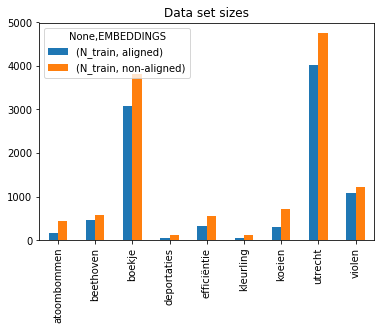

In [34]:
piv = pd.pivot_table(df, index=['DATA'], columns=['EMBEDDINGS'], values=['N_train'])
piv = piv.fillna(0.0)
piv.plot.bar()
plt.title('Data set sizes')
plt.xlabel("")
plt.ylabel("")
plt.savefig('9_alignment_datasets_N.png', dpi=100)
plt.show()

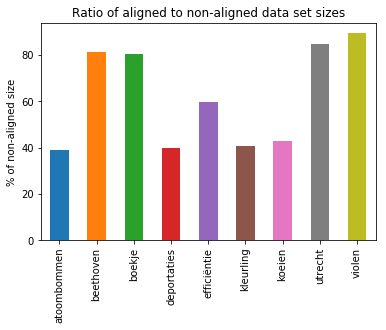

In [52]:
puv = piv.apply(lambda row: 100 * row[0] / row[1], axis=1)
puv.plot.bar()
plt.title('Ratio of aligned to non-aligned data set sizes')
plt.xlabel("")
plt.ylabel("% of non-aligned size")
plt.savefig('10_alignment_N_datasets_ratios.png', dpi=100)
plt.show()

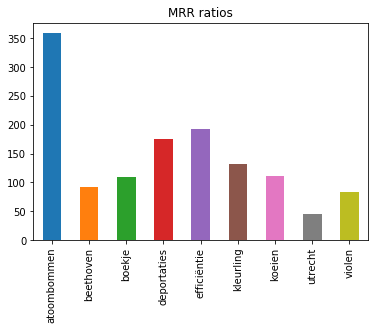

In [53]:
piv2 = pd.pivot_table(df, index=['DATA'], columns=['EMBEDDINGS'], values=['MRR'])
puv2 = piv2.apply(lambda row: 100 * row[0] / row[1], axis=1)
puv2.plot.bar()
plt.title('MRR ratios')
plt.xlabel("")
plt.ylabel("")
plt.savefig('11_alignment_datasets_MRR_ratios.png', dpi=100)
plt.show()

In [54]:
df2 = pd.DataFrame(data={'N': puv, 'MRR': puv2})

In [55]:

df2

MRR          N
DATA                              
atoombommen  359.020254  38.888889
beethoven     92.610055  81.250000
boekje       109.090909  80.439906
deportaties  175.958602  40.000000
efficiëntie  192.410616  59.671533
kleurling    131.682235  40.625000
koeien       110.459349  42.777778
utrecht       45.384615  84.701178
violen        83.787071  89.421488

# Analyzing concept-specific performance

## N per concept

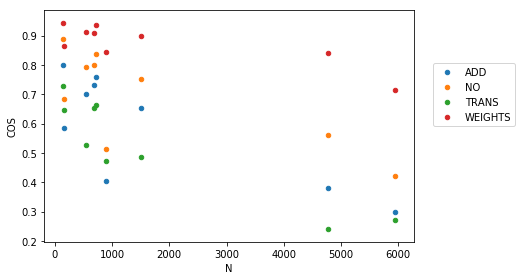

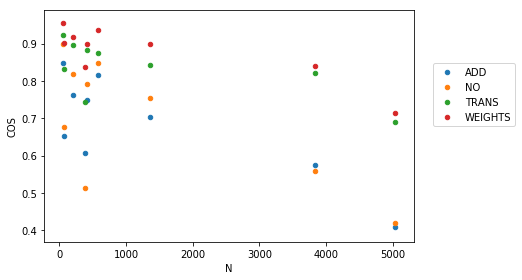

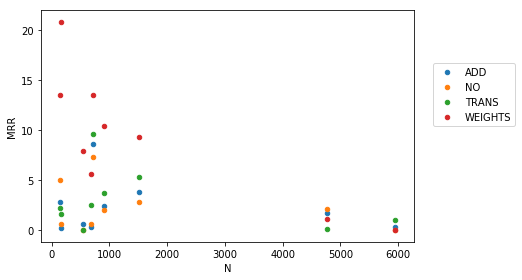

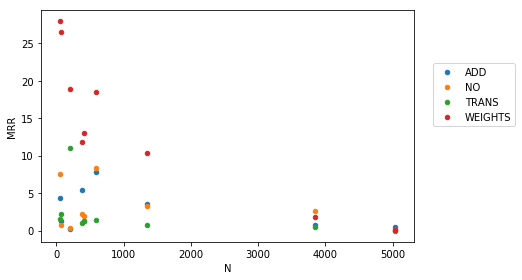

In [66]:
def select(df, score, is_aligned, model):
    df2 = pd.pivot_table(df, index=['DATA'], columns=['EMBEDDINGS', 'MODEL'], values=['MRR', 'N', 'COS'])
    alignment = 'aligned' if is_aligned else 'non-aligned'
    return pd.DataFrame({'N': df2['N'][alignment][model], score:  df2[score][alignment][model]})

def plot_score(df, score, is_aligned):
    ax = None
    for model, color in [('ADD', 'tab:blue'), ('NO', 'tab:orange'), ('TRANS', 'tab:green'), ('WEIGHTS', 'tab:red')]:
        df2 = select(df, score, is_aligned, model)
        if ax:
            ax = df2.plot.scatter(x='N', y=score, label=model, color=color, ax=ax, legend=None)
        else:
            ax = df2.plot.scatter(x='N', y=score, label=model, color=color, legend=None)
    #plt.title('N vs ' + score)

for score, is_aligned in [('COS', False), ('COS', True), ('MRR', False), ('MRR', True)]:
    plot_score(df, score, is_aligned)
    plt.legend(['ADD', 'NO', 'TRANS', 'WEIGHTS'], loc=(1.05,0.5))
    alignment = 'aligned' if is_aligned else 'non-aligned'
    plt.tight_layout()
    plt.savefig('../../ma-thesis/figures/N_vs_{0}_{1}.pgf'.format(score, alignment), dpi=100)
    plt.show()

## K per concept (number of classes)

In [13]:
df3 = pd.read_table('../data/analogies/1955_1985_classes.tsv')
df3['DATA'] = df3['DATA'].apply(lambda path: path.split(',')[-1])
df3 = df3[df3['DATA'].isin(df['DATA'].unique())]

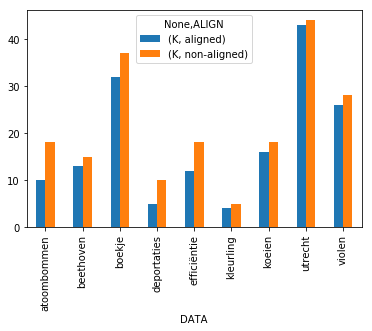

In [14]:
df3 = pd.pivot_table(df3, index=['DATA'], columns=['ALIGN'], values=['K'])
df3.plot.bar()
plt.show()

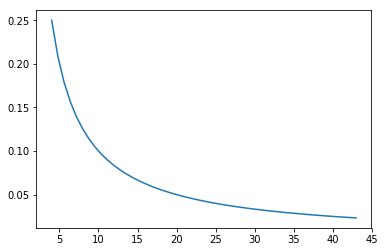

In [25]:
# Accuracy random baseline
# TODO Similar for MRR/COS

min_K = df3['K']['aligned'].min()
max_K = df3['K']['aligned'].max()
x = np.linspace(min_K, max_K)
y = 1/x
plt.plot(x, y)
plt.show()

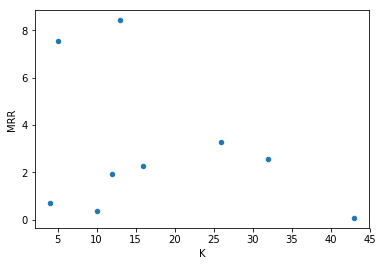

In [132]:
is_aligned = True
score = 'MRR'
model = 'NO'

df2 = pd.pivot_table(df, index=['DATA'], columns=['EMBEDDINGS', 'MODEL'], values=['MRR', 'N', 'COS'])
alignment = 'aligned' if is_aligned else 'non-aligned'
df4 = pd.DataFrame({'K': df3['K']['aligned'], score: df2[score][alignment][model]})

df4.plot.scatter(x='K', y=score)
plt.show()

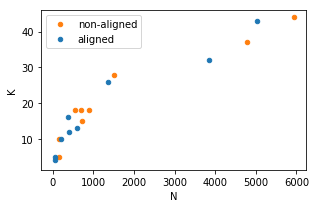

In [164]:
is_aligned = True

def select_with_K(is_aligned):
    df2 = pd.pivot_table(df, index=['DATA'], columns=['EMBEDDINGS'], values=['N',])
    alignment = 'aligned' if is_aligned else 'non-aligned'
    return pd.DataFrame({'K': df3['K'][alignment], 'N': df2['N'][alignment]})

ax = select_with_K(False).plot.scatter(x='N', y='K', color='tab:orange', label='non-aligned', figsize=(4.5,3))
select_with_K(True).plot.scatter(x='N', y='K', ax=ax, color='tab:blue', label='aligned')
plt.tight_layout()
plt.savefig('../../ma-thesis/figures/K_vs_N.pgf', dpi=100)
plt.show()

K_vs_COS_non-aligned.pgf


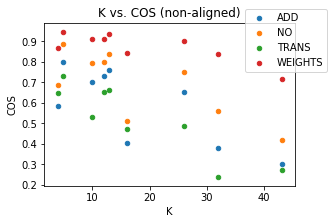

K_vs_COS_aligned.pgf


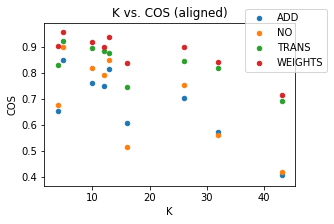

K_vs_MRR_non-aligned.pgf


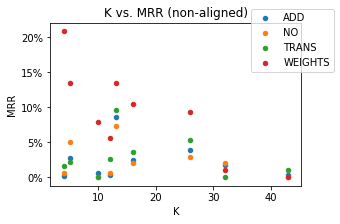

K_vs_MRR_aligned.pgf


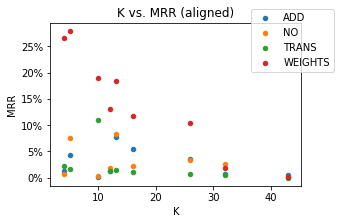

In [185]:
def select(df, score, is_aligned, model):
    df2 = pd.pivot_table(df, index=['DATA'], columns=['EMBEDDINGS', 'MODEL'], values=['MRR', 'N', 'COS'])
    alignment = 'aligned' if is_aligned else 'non-aligned'
    return pd.DataFrame({'K': df3['K']['aligned'], score:df2[score][alignment][model]})

def plot_score(df, score, is_aligned):
    ax = None
    for model, color in [('ADD', 'tab:blue'), ('NO', 'tab:orange'), ('TRANS', 'tab:green'), ('WEIGHTS', 'tab:red')]:
        df2 = select(df, score, is_aligned, model)
        if ax:
            ax = df2.plot.scatter(x='K', y=score, label=model, color=color, ax=ax, legend=None, figsize=(4.5,3))
        else:
            ax = df2.plot.scatter(x='K', y=score, label=model, color=color, legend=None, figsize=(4.5,3))
        
        if score == 'MRR':
            fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
            yticks = FormatStrFormatter(fmt)
            ax.yaxis.set_major_formatter(yticks)
            
        alignment = 'aligned' if is_aligned else 'non-aligned'
        plt.title('K vs. {0} ({1})'.format(score, alignment))

for score, is_aligned in [('COS', False), ('COS', True), ('MRR', False), ('MRR', True)]:
    plot_score(df, score, is_aligned)
    plt.legend(['ADD', 'NO', 'TRANS', 'WEIGHTS'], loc=(0.8,0.7))
    alignment = 'aligned' if is_aligned else 'non-aligned'
    #plt.tight_layout()
    plt.savefig('../../ma-thesis/figures/K_vs_{0}_{1}.pgf'.format(score, alignment), dpi=100)
    print('K_vs_{0}_{1}.pgf'.format(score, alignment))
    plt.show()